<a href="https://colab.research.google.com/github/Jerry-Zeng-UofT/JSC270_HW3_2025_-YZeng-/blob/main/JSC270_HW3_YUJIE_ZENG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JSC270 Assignment 3 Coding Part Yujie Zeng

In [3]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import random

## Part 1: Approximating pi

In [4]:
# Part 1 A:
# The Monte Carlo simulation back in stats is the method we use to estimate pi here.
# The description of the method is in the pdf file.
# A random seed is use to fix the result for report.

np.random.seed(270)

points = 1000000

x = np.random.uniform(0, 1, points)
y = np.random.uniform(0, 1, points)

inside_circle = np.sum((x - 0.5)**2 + (y - 0.5)**2 <= 0.5 ** 2)

fraction_inside = (inside_circle / points)

pi_estimated = 4 * fraction_inside

print(pi_estimated)

3.143604


In [5]:
# Part 1 B:

error = np.abs(np.pi - pi_estimated)
print(error)
percentage_error = round((error / np.pi * 100), 2)
print(str(percentage_error) + "%")

0.002011346410206727
0.06%


In [6]:
# Part 1 Bouns:



## Part 2: Understanding Bias

In [13]:
# Part 2 A:

sample_size_set = [10, 25, 50, 100, 250]
num_of_simulations = 1000
mean = 2
sd = 2
variance = sd**2
bias_estimator1 = []
bias_estimator2 = []

def estimator1(X) -> float:
    """ """
    n = len(X)
    xbar = np.mean(X)
    variance = np.sum((X - xbar) ** 2) / (n - 1)
    return variance

def estimator2(X) -> float:
    """ """
    n = len(X)
    xbar = np.mean(X)
    variance = np.sum((X - xbar) ** 2) / (n)
    return variance

def bias_calculator(X) -> float:
    """
    The logical of calculating bias is:
    bias = E[theta_bar - theta] = E[theta_bar] - E[theta] = average estimation - population expected estimator
    the result if rounded to 2 decimal places for comparision.
    """
    return (np.mean(X) - variance).round(2)


for sample_size in sample_size_set:
    sample = np.random.normal(loc=mean, scale=sd, size= (num_of_simulations, sample_size))
    result_list_estimator1 = []
    result_list_estimator2 = []
    for i in range(num_of_simulations):
        result1 = estimator1(sample[i])
        result2 = estimator2(sample[i])
        result_list_estimator1.append(result1)
        result_list_estimator2.append(result2)
    bias1 = bias_calculator(result_list_estimator1)
    bias2 = bias_calculator(result_list_estimator2)
    bias_estimator1.append(bias1)
    bias_estimator2.append(bias2)


print(bias_estimator1)
print(bias_estimator2)

[0.02, -0.01, -0.05, 0.0, 0.01]
[-0.39, -0.17, -0.12, -0.04, -0.0]


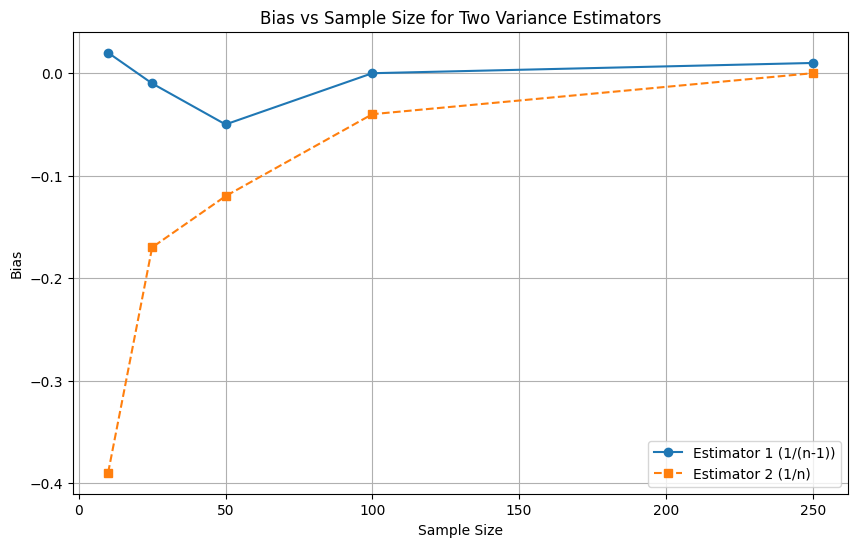

In [14]:
# Part 2 B:

plt.figure(figsize=(10, 6))
plt.plot(sample_size_set, bias_estimator1, marker='o', linestyle='-', label="Estimator 1 (1/(n-1))")
plt.plot(sample_size_set, bias_estimator2, marker='s', linestyle='--', label="Estimator 2 (1/n)")

plt.xlabel("Sample Size")
plt.ylabel("Bias")
plt.title("Bias vs Sample Size for Two Variance Estimators")
plt.legend()
plt.grid(True)
plt.show()

## Part 3: Simulation IRL
